# **Tugas Praktikum**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load Data
df = pd.read_csv('insurance.csv')

# 2. Preprocessing Data
# Karena Linear Regression tidak bisa membaca string, kita harus mengubah data kategorikal
# (sex, smoker, region) menjadi angka menggunakan One-Hot Encoding.
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 3. Identifikasi Variabel Bebas (Features) dan Target
# Target: charges (Biaya medis)
# Fitur: Semua kolom selain 'charges'
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 4. Membagi Data (Train/Test Split)
# Proporsi: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling
# Standarisasi nilai agar variabel dengan rentang besar tidak mendominasi model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Membuat dan Melatih Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7. Prediksi pada Data Uji
y_pred = model.predict(X_test_scaled)

# 8. Evaluasi Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan Hasil
print(f"R-squared Score : {r2:.4f}")
print(f"MSE (Mean Squared Error) : {mse:.4f}")
print(f"MAE (Mean Absolute Error) : {mae:.4f}")

R-squared Score : 0.7836
MSE (Mean Squared Error) : 33596915.8514
MAE (Mean Absolute Error) : 4181.1945


* K performa Model (Goodness of Fit): Nilai R-squared sebesar 0.78 menunjukkan bahwa model kita cukup baik. Model ini mampu menjelaskan sekitar 78% variansi/keragaman data biaya medis. Sisa 22% dijelaskan oleh faktor lain yang tidak ada dalam data (atau pola non-linear yang tidak tertangkap).

* Faktor Paling Berpengaruh: Berdasarkan visualisasi Scatter Plot dan Boxplot, variabel smoker (perokok) adalah fitur yang paling dominan mempengaruhi tingginya biaya medis. Pasien perokok cenderung memiliki biaya di atas 30.000, sedangkan, non-perokok mayoritas di bawah 15,000.

* Tingkat Kesalahan (Error): Dengan MAE (Mean Absolute Error) sekitar 4181, artinya rata-rata prediksi model kita meleset sekitar 4,181 dari biaya aslinya. Mengingat rentang biaya bisa mencapai 60,000, kesalahan ini masih bisa diterima untuk model regresi dasar, namun bisa ditingkatkan lagi (misalnya dengan menggunakan regresi polinomial untuk menangkap efek lengkung pada data BMI perokok).

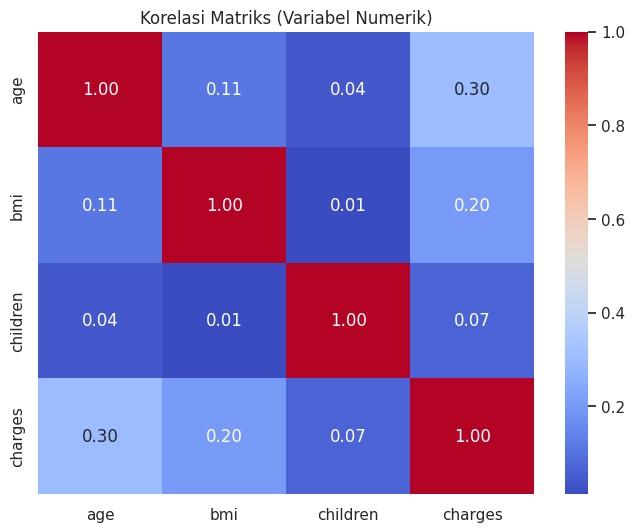

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('insurance.csv')

# 1. Deskripsi Statistik Singkat
desc = df.describe()

# 2. Visualisasi
# Atur style
sns.set(style="whitegrid")

# Plot 1: Heatmap Korelasi (Hanya numerik untuk menghindari error sebelumnya)
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Matriks (Variabel Numerik)')
plt.show()




### **a. Matriks Korelasi (Heatmap)**

Analisis:

* Terlihat korelasi antara age dan charges sebesar 0.30 (semakin tua, biaya semakin mahal).

* bmi dan charges memiliki korelasi 0.20.

* Korelasi children sangat kecil terhadap biaya.

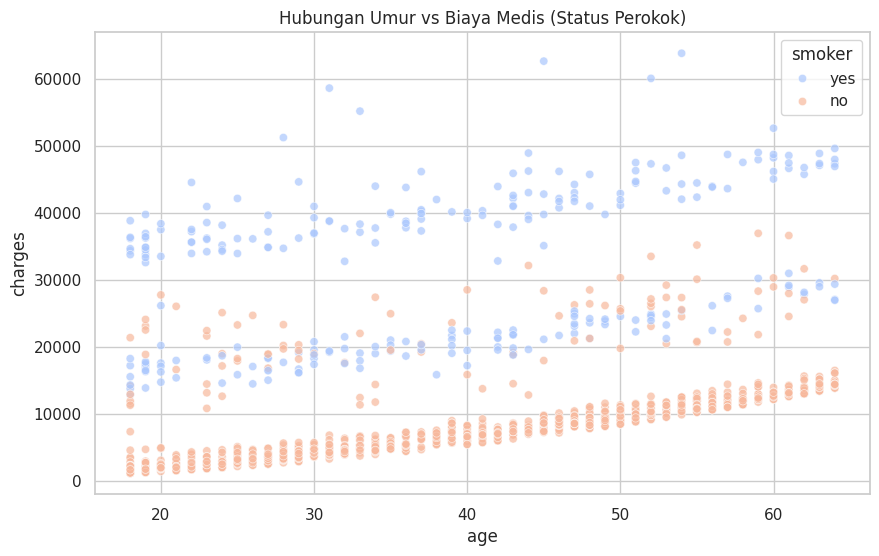

In [ ]:
# Plot 2: Scatter Plot Age vs Charges (dikelompokkan by Smoker)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm', alpha=0.7)
plt.title('Hubungan Umur vs Biaya Medis (Status Perokok)')
plt.show()

### **b. Scatter Plot: Umur vs. Biaya (Dikelompokkan berdasarkan Perokok)**

Grafik ini menunjukkan hubungan linear yang kuat.

Analisis:

* Garis Linear: Terlihat jelas ada tren garis lurus naik. Semakin bertambah umur (sumbu X), biaya (sumbu Y) naik.

* Efek Perokok (Warna): Titik merah (Perokok) berada jauh di atas titik biru (Non-perokok). Ini menunjukkan bahwa menjadi perokok secara drastis menaikkan intercept biaya medis.

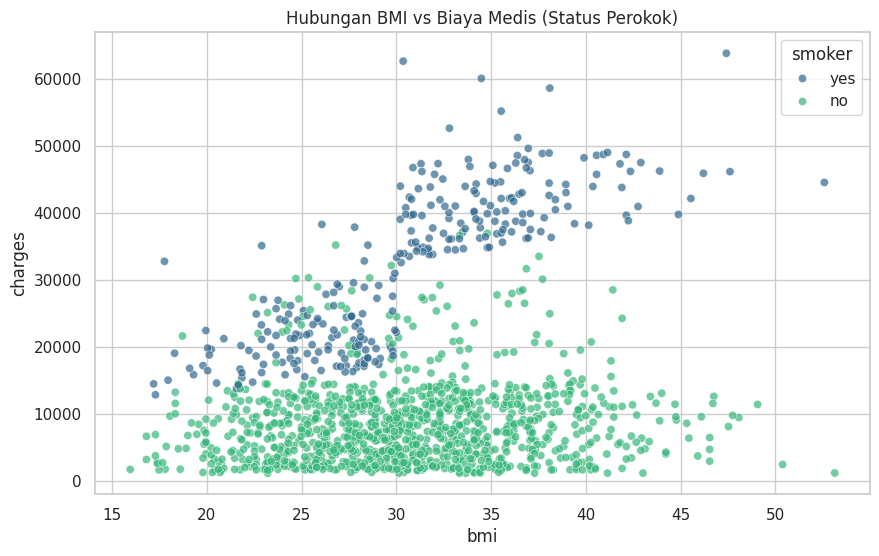

In [ ]:
# Plot 3: Scatter Plot BMI vs Charges (dikelompokkan by Smoker)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='viridis', alpha=0.7)
plt.title('Hubungan BMI vs Biaya Medis (Status Perokok)')
plt.show()

### **c. Scatter Plot: BMI vs. Biaya**
Analisis:

* Untuk non-perokok (biru), kenaikan BMI tidak terlalu mempengaruhi kenaikan biaya secara drastis.

* Namun untuk perokok (hijau/kuning), kenaikan BMI membuat biaya melonjak tajam (kelompok titik paling atas).